Модульная домашняя работа №1, анализ данных
=======

Вариант 8

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
#  Задаем рабочую папку
import os
os.chdir("/Users/adminadministrator/Documents/Институт биоинформатики/статистика/часть 2")


In [7]:
df = pd.read_csv('var_8.csv', index_col=0)

Убедимся, что с самими данными всё хорошо.

In [8]:
df.head(8)

,0,1,2,3,4,5
0,0.402600,0.080740,1.0,2216.901842,15.537681,64.282033
1,0.242155,0.264241,0.0,121721.061813,22.338273,99.387149
2,0.474903,0.333250,0.0,74278.898969,19.951980,91.689820
3,0.084012,0.150975,0.0,93.545667,18.701018,80.923222
4,0.029590,0.016051,1.0,32.119241,20.384301,71.441427
5,0.174618,0.144421,0.0,122434.489894,19.308477,94.971296
6,0.048418,0.030619,0.0,78223.472934,3.197905,29.478944
7,0.206235,0.175795,0.0,16.830593,27.842514,3.522868


Посмотрим на типы данных. Для проверки корректности прочтения (а то вдруг как строка считались числа)

In [9]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

Посмотрим на описательные статистики - кратко поймём что с данными

In [10]:
df.describe()

,0,1,2,3,4,5
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,0.199348,0.139780,0.400401,37788.484446,12.765320,56.907016
std,0.130928,0.131232,0.490143,40026.238894,8.862449,30.229644
min,-0.095682,-0.060264,0.000000,0.019742,-8.262715,0.240401
25%,0.098080,0.032649,0.000000,3926.469167,4.800313,30.324073
50%,0.184458,0.103134,0.000000,23485.167876,15.554036,66.512313
75%,0.279715,0.217768,1.000000,59289.807890,20.455408,83.398224
max,0.731775,0.705391,1.000000,141216.957798,28.989852,99.969423


Предположим, что колонка 2 - содержит какую-то бинарную информацию

In [11]:
df['2'].value_counts()

0.0    897
1.0    599
Name: 2, dtype: int64

In [12]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

Построим гистограммы для всех факторов. Так как колонок не очень много, можно построить матрицу диаграмм рассеивания, которая показывает все распределениями сразу. А на диагонали - оценка плонтости

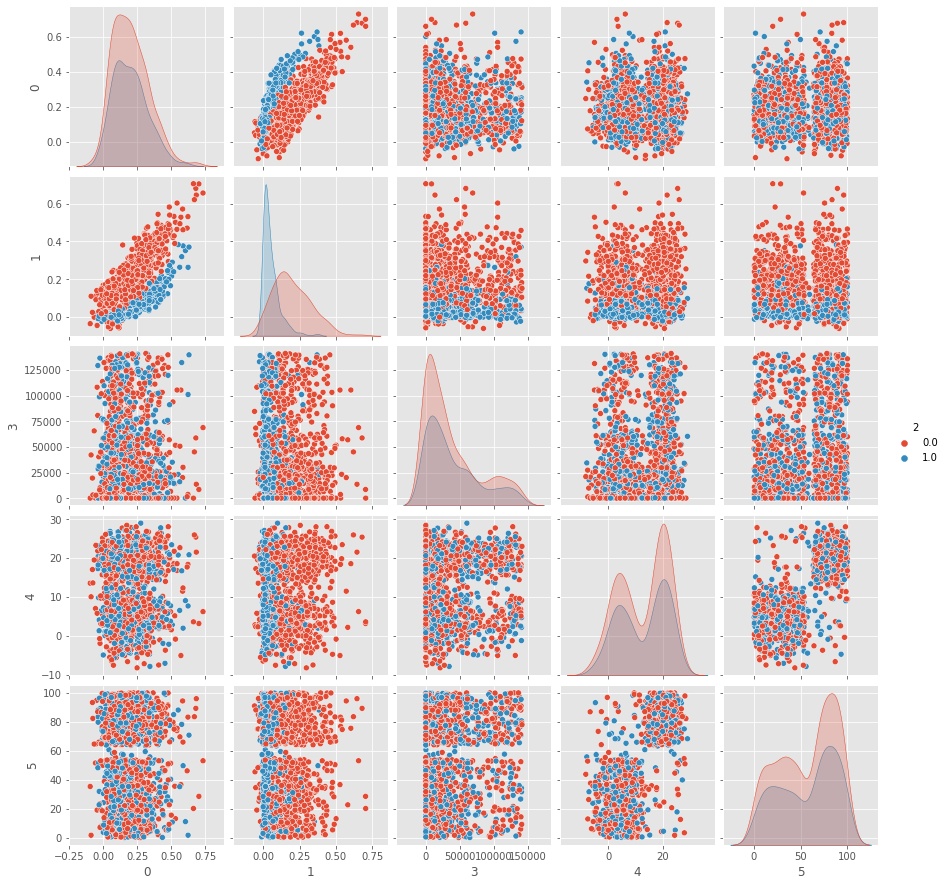

In [22]:
sns.pairplot(df, hue="2")

Обратим внимание, на особенности графиков (не обращайте внимание, на "крест" по середине). Есть разделение по преременной 1 и (5, 4,3) - все красные значения прижаты к 0. Также, видно что есть разделение на диагармме 0 - 1. Изучим это подробнее. Также есть интересная особенность, что значения признака 4 и 5 скорее всего бимодально. 

Так как в классах разное количество наблюдений - нормируем. 

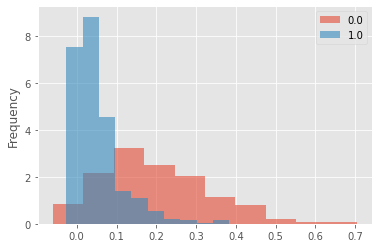

In [14]:
df.groupby('2')['1'].plot.hist(alpha=0.6, density = True)
plt.legend();

Видно, что значение 1 - соотвествует меньшим значениям параметра 1. Что уже представляет собой интересный факт

Посмотрим на интересные диаграммы рассеивания:

<AxesSubplot:xlabel='1', ylabel='3'>

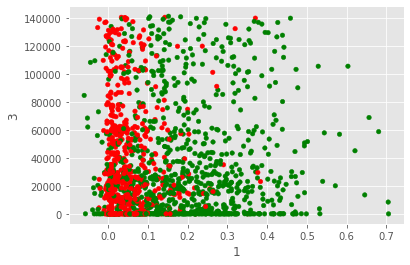

In [15]:
df.plot.scatter(x='1', y='3', c=df['2'].replace(colors))

<AxesSubplot:xlabel='1', ylabel='4'>

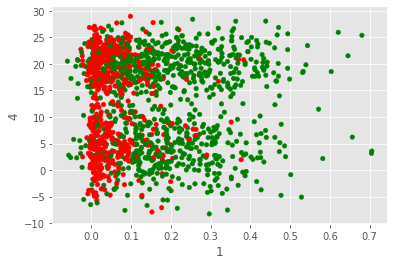

In [16]:
df.plot.scatter(x='1', y='4', c=df['2'].replace(colors))

<AxesSubplot:xlabel='1', ylabel='5'>

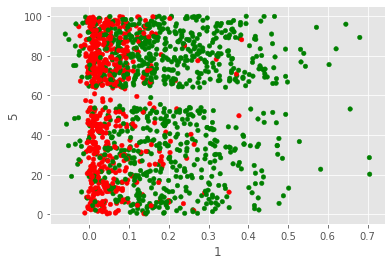

In [17]:
df.plot.scatter(x='1', y='5', c=df['2'].replace(colors))

Таким образом можно начать думать о том, почему красные значения (фактор 2 равен 1.0) так сильно прижаты к 0 по шкале фактора 1.  

<AxesSubplot:xlabel='1', ylabel='0'>

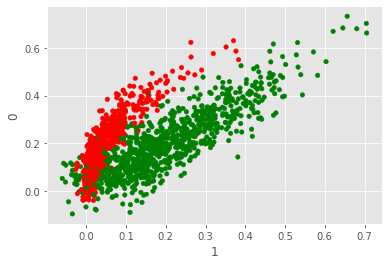

In [18]:
df.plot.scatter(x='1', y='0', c=df['2'].replace(colors))

обратим наше внимание, что точки данной диаграмме рассеяния имеют какую-то структуру. Можно предположить, что наблюдения с фактором 0 - распределены квадратично от значений параметра 1 и наблюдения с фактором 1 - распределены как корень.  

<AxesSubplot:xlabel='4', ylabel='5'>

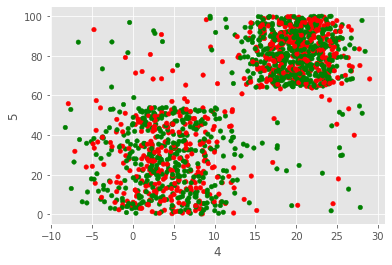

In [19]:
df.plot.scatter(x='4', y='5', c=df['2'].replace(colors))

Интересная особенность, что почти все наблюдения находятся в следующих квадратах: -10<фактор4<12.5 и 0<фактор5<60 или в квадрате  12.5<фактор4<30 и 60<фактор5<100. То есть есть какая то связь, которую тоже можно изучать.  

Рассмотрим boxplot-ы для наших показателей.  

<AxesSubplot:xlabel='2', ylabel='1'>

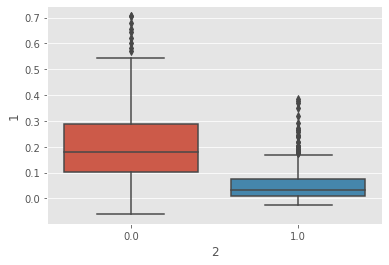

In [27]:
sns.boxplot(data = df, x = '2', y = '1')

Интересно отметить, что распредление признака 1 существенно изменяется по разным группам, при этом наблюдается большое количество выбросов. 

<AxesSubplot:xlabel='2', ylabel='3'>

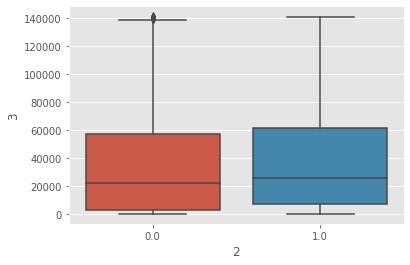

In [29]:
sns.boxplot(data = df, x = '2', y = '3')

В распредление прзнака 3 практически не отличается в двух группах, однако у группы у которой параметр 2 равен 0 имется несколько выбросов. 

<AxesSubplot:xlabel='2', ylabel='4'>

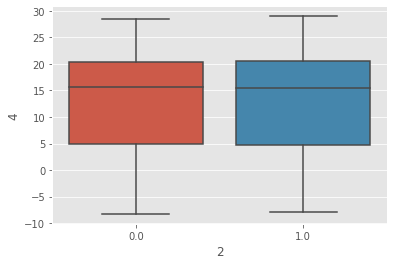

In [30]:
sns.boxplot(data = df, x = '2', y = '4')

Существенных различий не замечено, выбросов тоже нет

<AxesSubplot:xlabel='2', ylabel='5'>

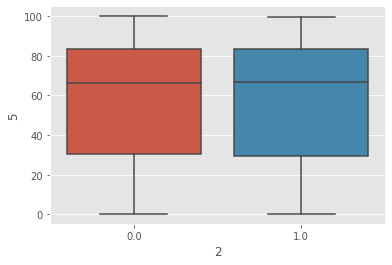

In [31]:
sns.boxplot(data = df, x = '2', y = '5')

Существенных различий не замечено, выбросов тоже нет